<a href="https://colab.research.google.com/github/Antique-1/deep-running-project/blob/main/dogs_vs_cats_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 이미지 분류 모델을 통한 딥러닝 실습 프로젝트

## 라이브러리 불러오기

In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array

## 데이터 로딩 및 전처리

In [ ]:
base_dir = 'C:/project_/train_sorted'

# ImageDataGenerator를 활용한 전처리 및 증강
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(250, 250),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(250, 250),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 19998 images belonging to 2 classes.
Found 4999 images belonging to 2 classes.


## CNN 모델 구성 및 학습

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(250,250,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\kbg00\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    55,116,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,210,049 (210.61 MB)

 Trainable params: 55,210,049 (210.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

c:\Users\kbg00\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.5488 - loss: 0.7097

c:\Users\kbg00\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 320s 511ms/step - accuracy: 0.5488 - loss: 0.7096 - val_accuracy: 0.6625 - val_loss: 0.6147
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 316s 506ms/step - accuracy: 0.6502 - loss: 0.6171 - val_accuracy: 0.7023 - val_loss: 0.5723
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 313s 500ms/step - accuracy: 0.6891 - loss: 0.5853 - val_accuracy: 0.7173 - val_loss: 0.5535
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 294s 470ms/step - accuracy: 0.7042 - loss: 0.5656 - val_accuracy: 0.7369 - val_loss: 0.5277
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 294s 471ms/step - accuracy: 0.7128 - loss: 0.5506 - val_accuracy: 0.7197 - val_loss: 0.5356
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 299s 478ms/step - accuracy: 0.7255 - loss: 0.5316 - val_accuracy: 0.7413 - val_loss: 0.5116
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 295s 472ms/step - accuracy: 0.7361 - loss: 0.5193 - val_accuracy: 0.7566 - val_loss: 0.5067
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 295s 472ms/step - accuracy: 0.7435 - loss: 0.51

## 학습 결과 시각화

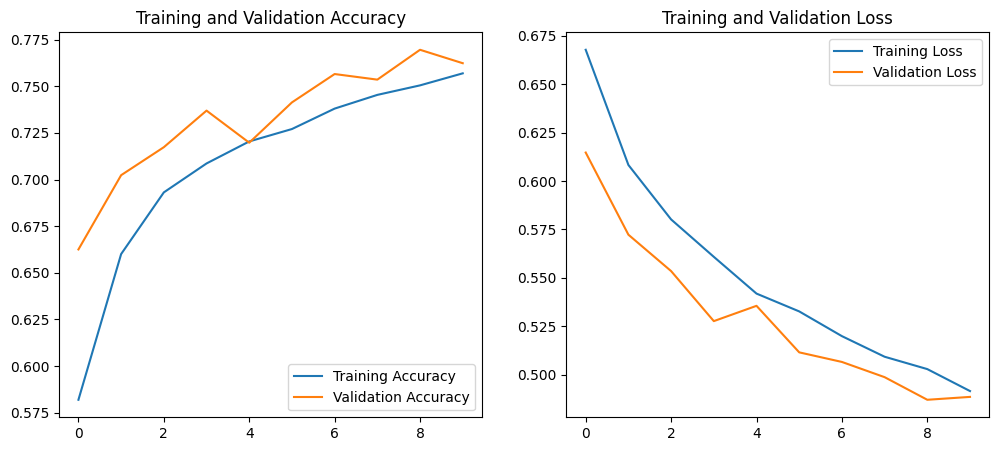

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 예측 결과

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


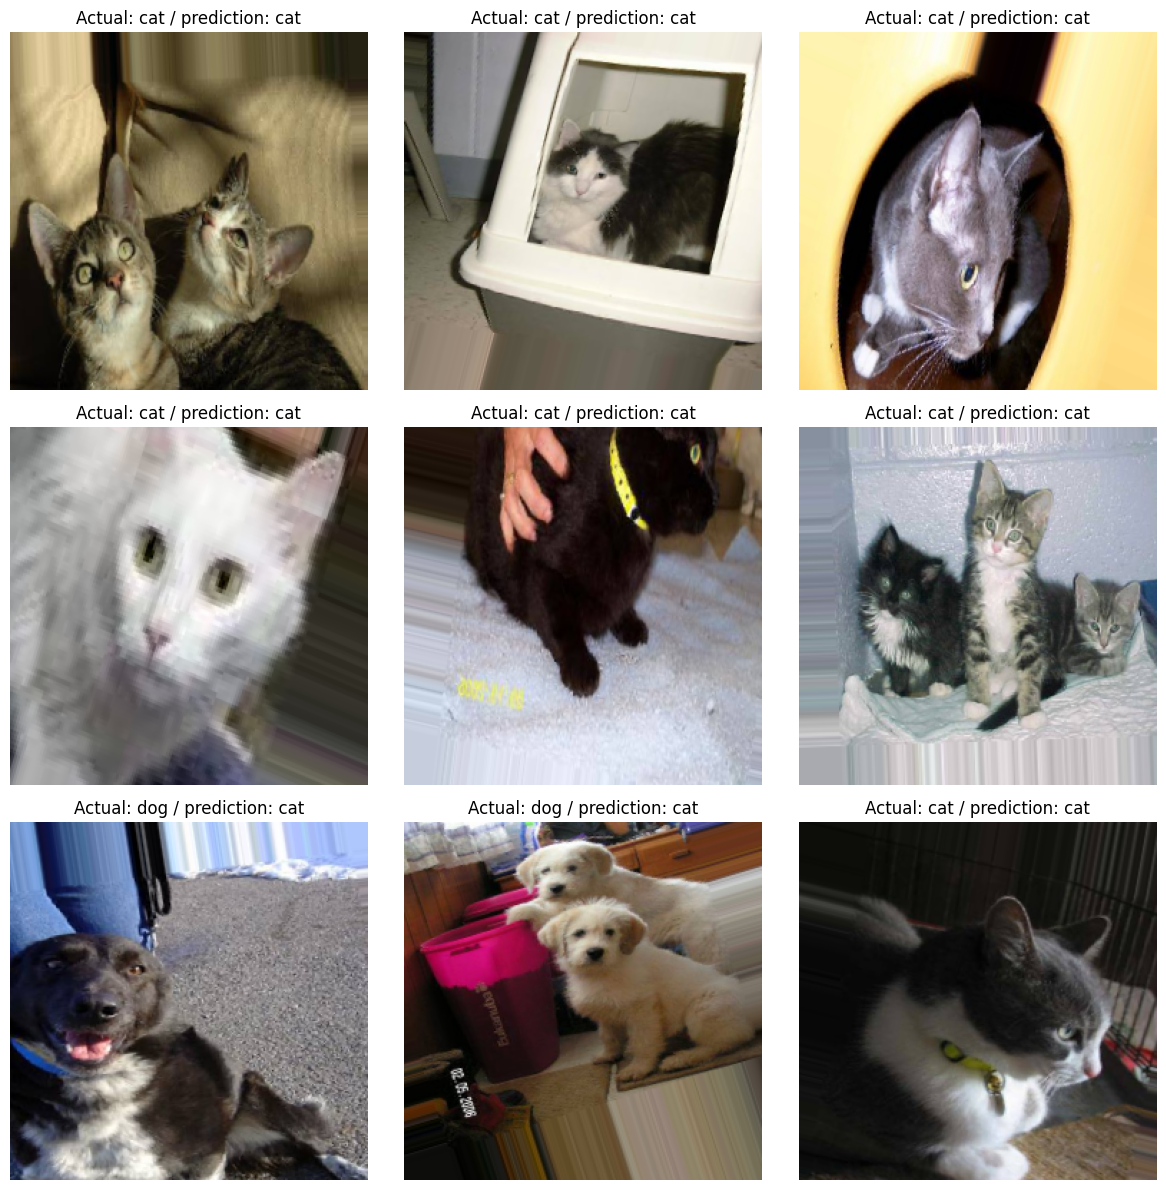

In [ ]:
# 예측 예시: 검증 세트 중 일부 이미지 확인
sample_images, sample_labels = next(val_generator)
predictions = model.predict(sample_images)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Actual: {'dog' if sample_labels[i] else 'cat'} / prediction: {'dog' if predictions[i] > 0.5 else 'cat'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
test_dir = 'C:/project_/test1'  # 테스트 이미지 폴더 경로
img_size = (250, 250)

test_images = sorted(os.listdir(test_dir), key=lambda x: int(x.split('.')[0]))

test_data = []
image_ids = []

for img_name in test_images:
    img_path = os.path.join(test_dir, img_name)
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    test_data.append(img_array)
    image_ids.append(int(img_name.split('.')[0]))

test_data = np.array(test_data)

predictions = model.predict(test_data)
predicted_labels = (predictions > 0.5).astype(int).flatten()

submission_df = pd.DataFrame({
    'id': image_ids,
    'label': predicted_labels
})
submission_df = submission_df.sort_values('id')
submission_df.to_csv('submission.csv', index=False)
print("✅ submission.csv 저장 완료!")

391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step
✅ submission.csv 저장 완료!


## VGG16 모델을 활용한 학습

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# VGG16 base 모델 불러오기 (FC 층 제거, imagenet 가중치 사용)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(250,250,3))
base_model.trainable = False  # feature extractor로 사용

# 상위 모델 구성
vgg_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

vgg_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,857 (57.14 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
vgg_history = vgg_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
369/625 ━━━━━━━━━━━━━━━━━━━━ 2:43 637ms/step - accuracy: 0.7795 - loss: 0.5122

KeyboardInterrupt: 

## CNN 모델과 VGG16 모델 성능 비교

In [ ]:
plt.figure(figsize=(14, 6))

# Accuracy 비교
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='CNN Validation Acc')
plt.plot(vgg_history.history['val_accuracy'], label='VGG16 Validation Acc')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss 비교
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='CNN Validation Loss')
plt.plot(vgg_history.history['val_loss'], label='VGG16 Validation Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()